# Interesting Image Processing with OpenCV Python

When designing a complete vision system, there are a number of steps that are taken in order to improve the final performance of this system.  Some of these steps are situation-specific, and not subject to generalization.  Some of these methods may work in one situation, and fail in another application where another method may be more suitable.  These processes are usually performed in order to minimize variations of information in the image, before it undergoes an additional intermediate step in the vision process.  How we minimize these image variations will vary according to the application. 
In this chapter, and the following next two chapters we will introduce some of the processes that are found in many computer vision systems.  We will look in detail how each  of these steps can help us to extract useful information from our images in an efficient manner.  

This is a list of steps that are usually performed in many computer vision systems.  The order and composition of this list will vary, according to the particular application, and industry.   

Calibration
Image Acquisition
Preprocessing
Image Partitioning
Feature Extraction
Image Understanding and Classification

In this chapter we will explore the calibration and preprocessing steps of a computer vision system using Python.  These steps are necessary to help us acquire  images under the right conditions, thus making it possible to understand the digitized image and its properties.  These steps will also assist us in the understanding, and classification of these images.

## A brief introduction to calibration

A properly executed calibration process allows us to identify those qualities that are inherent to the camera,  that may cause distortions in the imaging process.  The calibration process helps us minimize these effects in the image acquisition process.  
There are many forms of image distortions that can be found in computer vision systems.    These distortions cause changes in the magnification of images, making magnification uneven and unreliable. They cause images that have perfect straight lines to be rendered curved, and appear curvilinear in the middle of the image. Others create optical distortions as you get close to the edges of the image.  These distortions have different causes, and go by different names, and a full examination and analysis into them, is beyond the scope of this book. We will instead focus our attention into algorithms that are available to us,  that help to prevent, and minimize these distortions.
The OpenCV library contains algorithms that are very helpful in the calibration process.  It contains ways of generating testing patterns that we can use in our calibration procedures.  It also contains algorithms that help to calibrate the camera with the introduction of  known calibration images in various angles, poses,  and orientations.  These algorithms can locate predetermined corners and grid locations, thus calculate the error coefficients and parameters.  We can then use this information to 'undistort', and remove these distortions from the images.
For those of you who want to generate your own patterns, you can include the following two programs into a calibration directory.  These programs are part of the OpenCV library documentation and can be found by following this link address. I have not included them in their totality in order to save space in this chapter. 
https://github.com/Itseez/opencv/blob/master/doc/pattern_tools/gen_pattern.py
https://github.com/Itseez/opencv/blob/master/doc/pattern_tools/svgfig.py

In order to use the code in both programs to generate various svg calibration patterns, it is necessary to  include it in the same directory with the gen_pattern.py file.  

A scalable vector graphics (svg) file is an XML-based vector image format for 2D graphics with support and interactivity and animation. Software can be programmed to render SVG images by using a library such as librsvg used by Gnome since 2000, or Batik. SVG images can also be rendered to any desired popular image format by using the free-software command utility ImageMagick (which also uses librsvg under the hood).

The following line has a few parameters that merit some explanation.  When you run the program with this line it will generate a pattern of 9 columns, and 11 rows. It will save the pattern output image into a file called out.svg. This pattern will consist of asymmetrical circles, with units in mm, and a page height and width of 25.  These parameters can be changed depending in the type of image pattern that you are interested in.

shell$ python gen_pattern.py -c 9 -r 11 -o out.svg -T acircles -u mm -s 25


When you display the pattern image, in my case, I am using the display function found in ImageMagick,

shell$ display out.svg

I converted the image from a Scalable Vector Graphics image to a png image, or from out.svg to out.png, to make it easier and less memory intensive to include it here.

it will display the following image on the left.  In order to use the checkerboard pattern instead of the asymmetrical circles pattern.

shell$ python gen_pattern.py -c 9 -r 11 -o out.svg -T checkerboard -u mm -s 25


And it will display the image on the right.

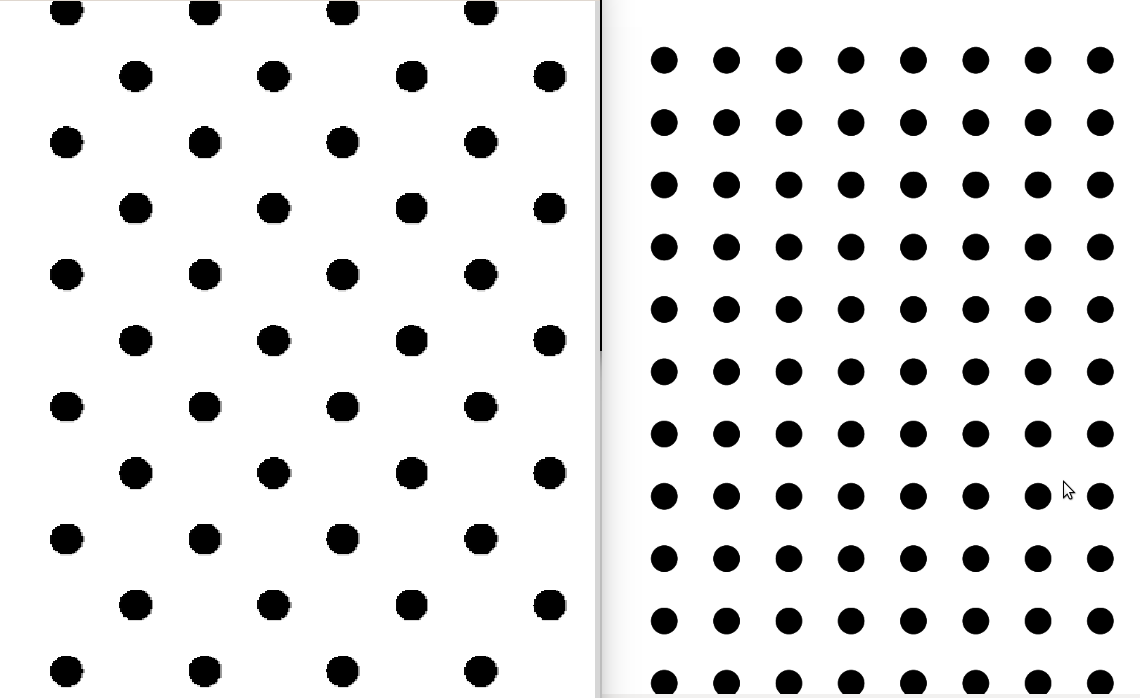

In [5]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_01.png') 

For those of us that instead of generating our own pattern, would rather use a predefined pattern, we can download one of the OpenCV chessboard patterns by going to this link,

http://docs.opencv.org/trunk/_downloads/pattern.png
Once downloaded we can print it, and tape it to a clear acrylic sheet transparent PMMA panel, or any other similar transparent material.  Transparency of the panel is very important in order to maximize image quality.  It is advisable to take 10 or more snapshots at different angles, poses, and orientations.  For additional ideas we can take a look at the sample pictures in the OpenCV library here,

https://github.com/Itseez/opencv_attic/blob/master/opencv/samples/cpp/left01.jpg
Once all the snapshots have been taken, we can put them in a calibration directory. In this directory we can include the following code, that can also be found here,
https://github.com/Itseez/opencv/blob/master/samples/python2/calibrate.py

In [ ]:
#!/usr/bin/env python

import numpy as np
import cv2
import os

from common import splitfn



USAGE = '''
USAGE: calib.py [--save <filename>] [--debug <output path>] [--square_size] [<image mask>]
'''
if __name__ == '__main__':
    import sys, getopt
    from glob import glob
    args, img_mask = getopt.getopt(sys.argv[1:], '', ['save=', 'debug=', 'square_size='])
    args = dict(args)
    try: img_mask = img_mask[0]
    except: img_mask = 'left*.jpg'
    img_names = glob(img_mask)
    debug_dir = args.get('--debug')
    square_size = float(args.get('--square_size', 1.0))
    pattern_size = (9, 6)
    pattern_points = np.zeros( (np.prod(pattern_size), 3), np.float32 )
    pattern_points[:,:2] = np.indices(pattern_size).T.reshape(-1, 2)
    pattern_points *= square_size
    obj_points = []
    img_points = []
    h, w = 0, 0
    for fn in img_names:
        print 'processing %s...' % fn,
        img = cv2.imread(fn, 0)
        h, w = img.shape[:2]
        found, corners = cv2.findChessboardCorners(img, pattern_size)
        if found:

            term = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1 )
            cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        if debug_dir:
            vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            cv2.drawChessboardCorners(vis, pattern_size, corners, found)
            path, name, ext = splitfn(fn)
            cv2.imwrite('%s/%s_chess.bmp' % (debug_dir, name), vis)
        if not found:
            print 'chessboard not found'
            continue
        img_points.append(corners.reshape(-1, 2))
        obj_points.append(pattern_points)
        print 'ok'
    rms, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h))
    print "RMS:", rms
    print "camera matrix:\n", camera_matrix
    print "distortion coefficients: ", dist_coefs.ravel()
    cv2.destroyAllWindows()

In the calibration directory you will have the snapshots, and the two files, common.py and calibrate.py, and your directory should look like this,

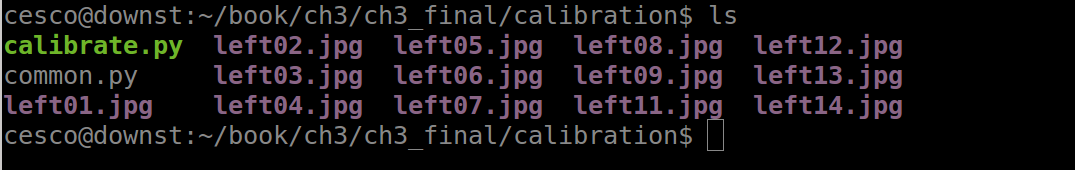

In [6]:
from IPython.display import Image
Image(filename='///home/cesco/Desktop/book_entirety/chapter2/images/B04209_02_02.png') 